## 2025-05-23 Overfitting

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
boston = pd.read_csv("boston.csv.bz2", sep="\t")
boston.shape

(506, 14)

In [23]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
yhat = boston.medv.mean()
yhat

22.532806324110677

In [25]:
np.sqrt(np.mean((boston.medv - yhat)**2))

9.188011545278203

In [26]:
from sklearn.linear_model import LinearRegression

y = boston.medv.values
X = boston.drop("medv", axis=1).values
X.shape

(506, 13)

In [27]:
m = LinearRegression()
_ = m.fit(X, y)
m.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [28]:
yhat = m.predict(X)

In [29]:
np.sqrt(np.mean((boston.medv - yhat)**2))

4.679191295697282

In [30]:
R360 = np.random.normal(size=(506, 360))
X360 = np.column_stack((X, R360))
X360.shape

(506, 373)

In [31]:
_ = m.fit(X360, y)
yhat = m.predict(X360)
np.sqrt(np.mean((boston.medv - yhat)**2))

2.4394232581318427

In [32]:
from sklearn.model_selection import train_test_split

Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.2)
Xt.shape

(404, 13)

In [33]:
_ = m.fit(Xt, yt)
yhatt = m.predict(Xt)
rmset = np.sqrt(np.mean((yt - yhatt)**2))
rmset

4.658443841180574

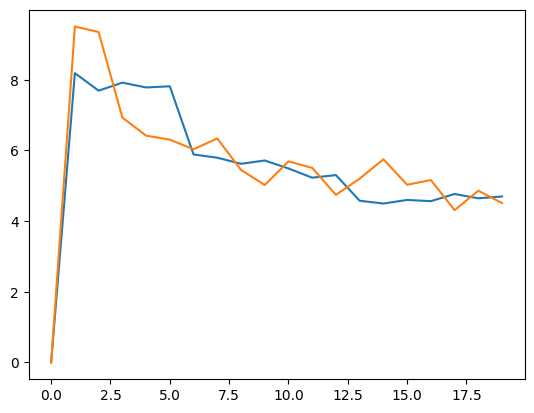

In [34]:
K = 20
rmset = np.empty(K)
rmsev = np.empty(K)
for k in range(1, K):
	Xk = X360[:,:k]
	Xt, Xv, yt, yv = train_test_split(Xk, y, test_size=0.2)
	_ = m.fit(Xt, yt)
	yhatt = m.predict(Xt)
	rmset[k] = np.sqrt(np.mean((yt - yhatt)**2))
	yhatv = m.predict(Xv)
	rmsev[k] = np.sqrt(np.mean((yv - yhatv)**2))

_ = plt.plot(rmset)
_ = plt.plot(rmsev)

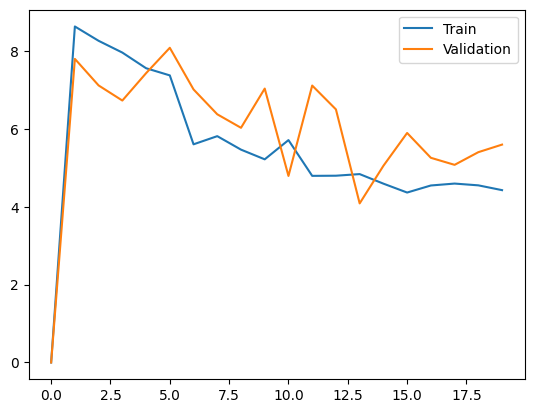

In [35]:
K = 20
rmset = np.empty(K)
rmsev = np.empty(K)
for k in range(1, K):
	Xk = X360[:,:k]
	Xt, Xv, yt, yv = train_test_split(Xk, y, test_size=0.2)
	_ = m.fit(Xt, yt)
	yhatt = m.predict(Xt)
	rmset[k] = np.sqrt(np.mean((yt - yhatt)**2))
	yhatv = m.predict(Xv)
	rmsev[k] = np.sqrt(np.mean((yv - yhatv)**2))

_ = plt.plot(rmset, label = "Train")
_ = plt.plot(rmsev, label = "Validation")
_ = plt.legend()

[0.         6.59753381 5.15601018 3.69287249 3.04891149 2.63614578
 2.18306624 1.70065418 1.51170638 1.10854193 0.81869986 0.66284412]
[0.         7.72796068 4.57400075 4.77232575 4.14292677 3.39155124
 5.10967022 4.42735851 3.53159171 4.25321266 3.23507829 4.76196098]


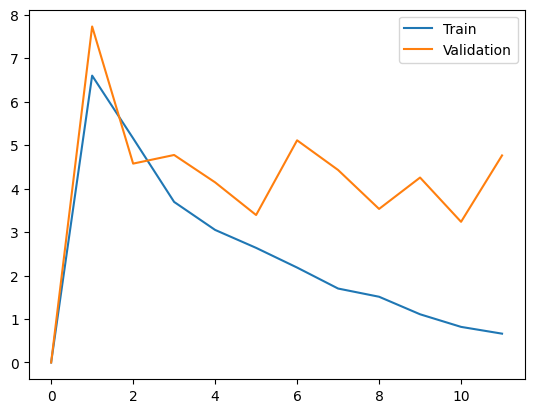

In [36]:
from sklearn.tree import DecisionTreeRegressor

K = 12
rmset = np.zeros(K)
rmsev = np.zeros(K)
for k in range(1, K):
	m = DecisionTreeRegressor(max_depth = k)
	Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.2)
	_ = m.fit(Xt, yt)
	yhatt = m.predict(Xt)
	rmset[k] = np.sqrt(np.mean((yt - yhatt)**2))
	yhatv = m.predict(Xv)
	rmsev[k] = np.sqrt(np.mean((yv - yhatv)**2))

print(rmset)
print(rmsev)
_ = plt.plot(rmset, label = "Train")
_ = plt.plot(rmsev, label = "Validation")
_ = plt.legend()